# Importing the Data

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
def get_minst():
    """This is a function to get the mnist data from the sklearn datasets

    Returns:
        tuple: the first item in the tuple is the features and the second in the tuple is the label
    """
    mnist = fetch_openml("mnist_784", version=1, parser="auto")
    x = mnist["data"].to_numpy()
    y = mnist["target"].to_numpy().astype(int)
    train = {"x":x[:60000], "y":y[:60000]}
    test = {"x":x[60000:], "y":y[60000:]}
    return train, test

In [2]:
train, test = get_minst()

In [3]:
x_train, y_train = train["x"], train["y"]

# Viewing the Data

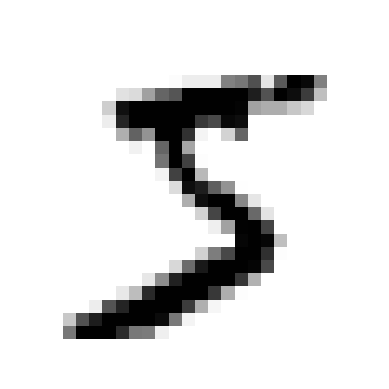

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
some_digit = x_train[0].reshape(28,28)

plt.imshow(some_digit, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [5]:
y_train[0]

5

# Defining Pipeline

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaling_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

In [7]:
scaling_pipeline.fit(x_train)

Pipeline(steps=[('std_scaler', StandardScaler())])

# Training Models

In [8]:
x_train_prepared = scaling_pipeline.transform(x_train)

In [9]:
from sklearn.tree import DecisionTreeClassifier


d_tree = DecisionTreeClassifier()

In [10]:
from sklearn.model_selection import cross_val_predict

d_tree_cv = cross_val_predict(d_tree, x_train_prepared, y_train, method="predict", cv=5)

In [11]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import numpy as np
def evaluate(y_true, y_pred):
    score = np.array([f1_score(y_true, y_pred, average='macro'), 
                     recall_score(y_true, y_pred, average='macro'),
                     precision_score(y_true, y_pred, average='macro'),
                     accuracy_score(y_true, y_pred,)])
    print(f"The f1 score is {score[0]}")
    print(f"The recall score is {score[1]}")
    print(f"The precision score is {score[2]}")
    print(f"The accuracy score is {score[3]}")

In [12]:
d_tree_scores = evaluate(y_train, d_tree_cv)

The f1 score is 0.8644816001119769
The recall score is 0.8644977272286942
The precision score is 0.8645058352082315
The accuracy score is 0.8662333333333333


In [13]:
from sklearn.ensemble import RandomForestClassifier

rand_frst_clf = RandomForestClassifier(random_state=42)

rand_frst_clf_cv = cross_val_predict(rand_frst_clf, x_train_prepared, y_train, cv=5)

In [14]:
evaluate(y_train, rand_frst_clf_cv)

The f1 score is 0.9663091725583051
The recall score is 0.9663396300367738
The precision score is 0.9663039853438914
The accuracy score is 0.9665666666666667


In [15]:
from sklearn.svm import SVC 

svc_clf = SVC()
svc_clf.fit(x_train_prepared, y_train)
svc_clf_cv = svc_clf.predict(x_train_prepared)

In [16]:
evaluate(y_train, svc_clf_cv)

The f1 score is 0.9866135495206294
The recall score is 0.9865729177448463
The precision score is 0.986660477028555
The accuracy score is 0.9866333333333334


In [23]:
x_test_prepared = scaling_pipeline.transform(x_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(x_train_prepared, y_train)

KNeighborsClassifier()

In [32]:
knn_clf_cv = cross_val_predict(knn_clf, x_train_prepared, y_train, cv=5)
evaluate(y_train, knn_clf_cv)

The f1 score is 0.9413888666235616
The recall score is 0.9411804513407592
The precision score is 0.942207148954717
The accuracy score is 0.94205


In [22]:
x_test, y_test = test["x"], test["y"]

In [24]:
full_pipeline = Pipeline([
    ("scaler", scaling_pipeline),
    ("predictor", svc_clf)
])

In [25]:
final_trial = full_pipeline.predict(x_test)

In [26]:
evaluate(y_test, final_trial)

The f1 score is 0.9657584887464468
The recall score is 0.9655920509507625
The precision score is 0.9660803747739279
The accuracy score is 0.966
